# Project: Ensemble Techniques - Travel Package Purchase Prediction

# **Background and Context:**

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

# **Objective:**

To predict which customer is more likely to purchase the newly introduced travel package.

# **Customer details:**

1. CustomerID: Unique customer ID
2. ProdTaken: Product taken flag
3. Age: Age of customer
4. TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
5. CityTier: City tier
6. Occupation: Occupation of customer
7. Gender: Gender of customer
8. NumberOfPersonVisited: Total number of person came with customer
9. PreferredPropertyStar: Preferred hotel property rating by customer
10. MaritalStatus: Marital status of customer
11. NumberOfTrips: Average number of the trip in a year by customer
12. Passport: The customer has passport or not
13. OwnCar: Customers owns a car flag
14. NumberOfChildrenVisited: Total number of children with age less than 5 visit with customer
15. Designation: Designation of the customer in the current organization
16. MonthlyIncome: Gross monthly income of the customer

# **Customer interaction data:**

1. PitchSatisfactionScore: Sales pitch satisfactory score
2. ProductPitched: Product pitched by a salesperson
3. NumberOfFollowups: Total number of follow up has been done by sales person after sales pitch
4. DurationOfPitch: Duration of the pitch by a salesman to customer

# **Best Practices for Notebook:**

- The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.
- The notebook should be run from start to finish in a sequential manner before submission.
- It is preferable to remove all warnings and errors before submission.
- The notebook should be submitted as an HTML file (.html) and as a notebook file (.ipynb)

## Index

- <a href = #link1>1. Overview of the dataset</a>


- <a href = #link2>2. EDA on data Insight (8 points)</a> 


- <a href = #link3>3. EDA insights (4 points)</a>


- <a href = #link4>4. Data pre-processing (7 points)</a> 


- <a href = #link5>5. Model building - bagging (4 points)</a>


- <a href = #link6>6. Model performance improvement - bagging (9 points) </a>


- <a href = #link7>7. Model building - boosting (6 points) </a>


- <a href = #link8>8. Model performance improvement - boosting (9 points) </a>


- <a href = #link9>9. Model performance evaluation (4 points) </a>


- <a href = #link10>10. Actionable insights and recommendations (5 points) </a>


- <a href = #link11>11. Notebook overall structure and flow (4 points) </a>

## <a id = "link1"></a> 1. Overview of the dataset 

**Importing required libraries.**

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

In [ ]:
# Checking working directory
import os
cwd = os.getcwd()
print (cwd)

In [2]:
#Loading dataset
data=pd.read_csv("Tourism.csv")

## <a id = "link2"></a> 2. Perform an Exploratory Data Analysis on the data - Univariate analysis - Bivariate analysis - Use appropriate visualizations to identify the patterns and insights - Come up with a customer profile (characteristics of a customer) of the different packages - Any other exploratory deep dive (8 points)

## <a id = "link3"></a> 3. Illustrate the insights based on EDA - Key meaningful observations on individual variables and the relationship between variables (4 points)

## <a id = "link4"></a>4. Data Pre-processing - Prepare the data for analysis - Missing value Treatment, Outlier Detection (treat, if needed- why or why not ), Feature Engineering, Prepare data for modeling (7 points)

In [3]:
data.head()

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0      200000          1  41.0     Self Enquiry         3              6.0   
1      200001          0  49.0  Company Invited         1             14.0   
2      200002          1  37.0     Self Enquiry         1              8.0   
3      200003          0  33.0  Company Invited         1              9.0   
4      200004          0   NaN     Self Enquiry         1              8.0   

       Occupation  Gender  NumberOfPersonVisited  NumberOfFollowups  \
0        Salaried  Female                      3                3.0   
1        Salaried    Male                      3                4.0   
2     Free Lancer    Male                      3                4.0   
3        Salaried  Female                      2                3.0   
4  Small Business    Male                      2                3.0   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe                    3.0        Single            1.0   
1         Deluxe                    4.0      Divorced            2.0   
2          Basic                    3.0        Single            7.0   
3          Basic                    3.0      Divorced            2.0   
4          Basic                    4.0      Divorced            1.0   

   Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisited  \
0         1                       2       1                      0.0   
1         0                       3       1                      2.0   
2         1                       3       0                      0.0   
3         1                       5       1                      1.0   
4         0                       5       1                      0.0   

  Designation  MonthlyIncome  
0     Manager        20993.0  
1     Manager        20130.0  
2   Executive        17090.0  
3   Executive        17909.0  
4   Executive        18468.0

In [4]:
data[['Age','DurationOfPitch','NumberOfTrips','MonthlyIncome']].describe().T

count          mean          std     min      25%      50%  \
Age              4662.0     37.622265     9.316387    18.0     31.0     36.0   
DurationOfPitch  4637.0     15.490835     8.519643     5.0      9.0     13.0   
NumberOfTrips    4748.0      3.236521     1.849019     1.0      2.0      3.0   
MonthlyIncome    4655.0  23619.853491  5380.698361  1000.0  20346.0  22347.0   

                     75%      max  
Age                 44.0     61.0  
DurationOfPitch     20.0    127.0  
NumberOfTrips        4.0     22.0  
MonthlyIncome    25571.0  98678.0

- Mean and median value for 'Age' is approx 38 and 36 respectively
- Mean and median value for 'DurationOfPitch' is approx 15 and 13 respectively
- Mean and median value for 'NumberOfTrips' is approx 3
- Mean and median value for 'MonthlyIncome' is approx 24000 and 22000 respectively
- Target variable seems to have slight skewed distribution on the right.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   TypeofContact            4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

- There are seven float datatypes, seven int64 datatypes, and six object datatypes.
- The object datatypes will be changed accordingly further along.

**Number of unique values in each column**

In [6]:
data.nunique()

CustomerID                 4888
ProdTaken                     2
Age                          44
TypeofContact                 2
CityTier                      3
DurationOfPitch              34
Occupation                    4
Gender                        3
NumberOfPersonVisited         5
NumberOfFollowups             6
ProductPitched                5
PreferredPropertyStar         3
MaritalStatus                 4
NumberOfTrips                12
Passport                      2
PitchSatisfactionScore        5
OwnCar                        2
NumberOfChildrenVisited       4
Designation                   5
MonthlyIncome              2475
dtype: int64

- We can drop 'CustomerID' column as it is an ID variable and will not add value to the model.

In [7]:
data.drop(columns=['CustomerID'], inplace=True)
data['Gender'].replace('Fe Male', 'Female', inplace=True)

- In the 'Gender' column 'Fe Male' had to be replaced 'Female' as to remove another variable type.

**Data Pre-processing**

In [8]:
data.isnull().sum()

ProdTaken                    0
Age                        226
TypeofContact               25
CityTier                     0
DurationOfPitch            251
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64

- Eight columns contain missing values that will require attendtion to resolve.

In [9]:
data['TypeofContact'].replace('Self Enquiry', '0', inplace=True)
data['TypeofContact'].replace('Company Invited', '1', inplace=True)

- Changing to numberical values for calculation further along in Notebook.

In [10]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['DurationOfPitch'] = data['DurationOfPitch'].fillna(data['DurationOfPitch'].mean())
data['NumberOfFollowups'] = data['NumberOfFollowups'].fillna(data['NumberOfFollowups'].mean())
data['PreferredPropertyStar'] = data['PreferredPropertyStar'].fillna(data['PreferredPropertyStar'].mean())
data['NumberOfTrips'] = data['NumberOfTrips'].fillna(data['NumberOfTrips'].mean())
data['NumberOfChildrenVisited'] = data['NumberOfChildrenVisited'].fillna(data['NumberOfChildrenVisited'].mean())
data['MonthlyIncome'] = data['MonthlyIncome'].fillna(data['MonthlyIncome'].mean())

- This process changes the missing values to the mean value of the column.

In [11]:
#this is to change type to category from object
data['TypeofContact'] = data['TypeofContact'].astype('float')
data['Occupation'] = data['Occupation'].astype('category')
data['Gender'] = data['Gender'].astype('category')
data['ProductPitched'] = data['ProductPitched'].astype('category')
data['MaritalStatus'] = data['MaritalStatus'].astype('category')
data['Designation'] = data['Designation'].astype('category')

- This process changes objects to other data types for further use in the Notebook.

In [12]:
data['TypeofContact'] = data['TypeofContact'].fillna(data['TypeofContact'].mean())

- This process addresses missing values in the Notebook and fills in missing fields with the column mean average.

In [13]:
data['TypeofContact'] = data['TypeofContact'].astype('int64')
data['NumberOfFollowups'] = data['NumberOfFollowups'].astype('int64')

- This process changes the datatype to integer to allow numerical value calculations further down in the Notebook.

In [14]:
data['TypeofContact'].replace('Company Invited', '0', inplace=True)
data['TypeofContact'].replace('Self Enquiry', '1', inplace=True)
data['Occupation'].replace('Free Lancer', '0', inplace=True)
data['Occupation'].replace('Large Business', '1', inplace=True)
data['Occupation'].replace('Salaried', '2', inplace=True)
data['Occupation'].replace('Small Business', '3', inplace=True)
data['Gender'].replace('Female', '0', inplace=True)
data['Gender'].replace('Male', '1', inplace=True)
data['ProductPitched'].replace('Basic', '0', inplace=True)
data['ProductPitched'].replace('Deluxe', '1', inplace=True)
data['ProductPitched'].replace('King', '2', inplace=True)
data['ProductPitched'].replace('Super Deluxe', '3', inplace=True)
data['ProductPitched'].replace('Standard', '4', inplace=True)
data['MaritalStatus'].replace('Divorced', '0', inplace=True)
data['MaritalStatus'].replace('Married', '1', inplace=True)
data['MaritalStatus'].replace('Single', '2', inplace=True)
data['MaritalStatus'].replace('Unmarried', '3', inplace=True)
data['Designation'].replace('AVP', '0', inplace=True)
data['Designation'].replace('Executive', '1', inplace=True)
data['Designation'].replace('Manager', '2', inplace=True)
data['Designation'].replace('Senior Manager', '3', inplace=True)
data['Designation'].replace('VP', '4', inplace=True)

- This process changes the data values to numbers to allow for ease of calulation and analysis purposes.

In [15]:
data['Occupation'] = data['Occupation'].astype('int64')
data['Gender'] = data['Gender'].astype('int64')
data['ProductPitched'] = data['ProductPitched'].astype('int64')
data['MaritalStatus'] = data['MaritalStatus'].astype('int64')
data['Designation'] = data['Designation'].astype('int64')

- This process changes the datatype to integer to allow numerical value calculations further down in the Notebook.

**Summary of the dataset**

In [16]:
cat_cols=['ProdTaken','Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation', 'Gender',
          'NumberOfPersonVisited', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
         'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisited', 'Designation',
         'MonthlyIncome']

for column in cat_cols:
    print(data[column].value_counts())
    print('-'*30)

0    3968
1     920
Name: ProdTaken, dtype: int64
------------------------------
35.000000    237
36.000000    231
37.622265    226
34.000000    211
31.000000    203
30.000000    199
32.000000    197
33.000000    189
37.000000    185
29.000000    178
38.000000    176
41.000000    155
39.000000    150
28.000000    147
40.000000    146
42.000000    142
27.000000    138
43.000000    130
46.000000    121
45.000000    116
26.000000    106
44.000000    105
51.000000     90
47.000000     88
50.000000     86
25.000000     74
52.000000     68
53.000000     66
49.000000     65
48.000000     65
55.000000     64
54.000000     61
56.000000     58
24.000000     56
22.000000     46
23.000000     46
59.000000     44
21.000000     41
20.000000     38
19.000000     32
58.000000     31
60.000000     29
57.000000     29
18.000000     14
61.000000      9
Name: Age, dtype: int64
------------------------------
0    3469
1    1419
Name: TypeofContact, dtype: int64
------------------------------
1    3190
3   

- This is a clean version of all the values of the datasets within this project.  The four continous variables are prevelent and the other relevant data is neatly presented.

### Univariate analysis

In [17]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

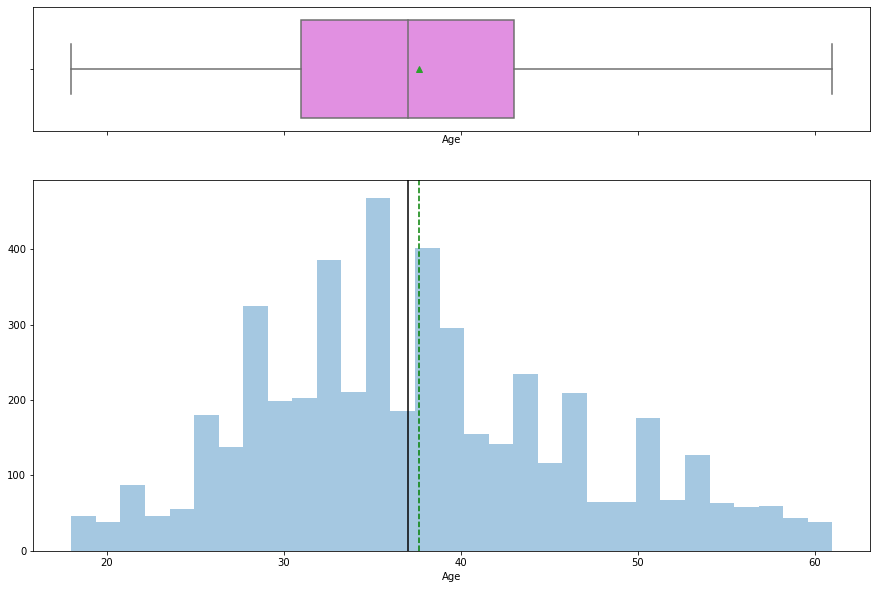

In [18]:
histogram_boxplot(data['Age'])

- "Age" is relatively well distributed with a slight right skew.  There are no outliers requiring attention and this dataset appears sufficient for the model.

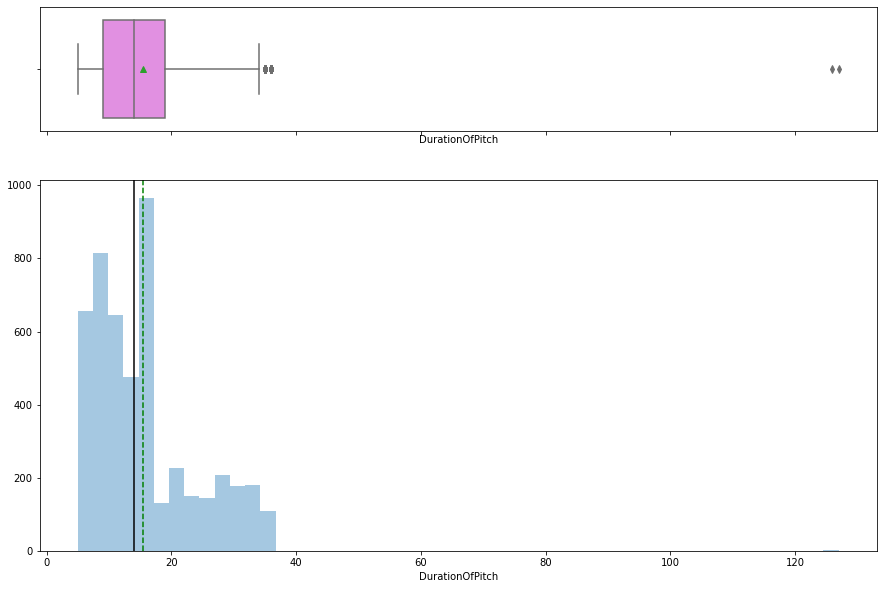

In [19]:
histogram_boxplot(data['DurationOfPitch'])

- "DurationOfPitch" is excessively skewed to the right and there are two extreme outliers requiring attention.  In the next step these will be addressed to better prepare the data for model use.

In [20]:
Q1=data['DurationOfPitch'].quantile(0.25)
Q3=data['DurationOfPitch'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)
data = data[data['DurationOfPitch']< Upper_Whisker]
data = data[data['DurationOfPitch']> Lower_Whisker]

9.0
19.0
10.0
-6.0 34.0


- Utilized the above algorithm to remove the outliers and better balance the distribution.  This algorithm is reused within the Notebook to ensure consistency and accuracy.  "DurationOfPitch" is now better but continues to have a significant right skew.

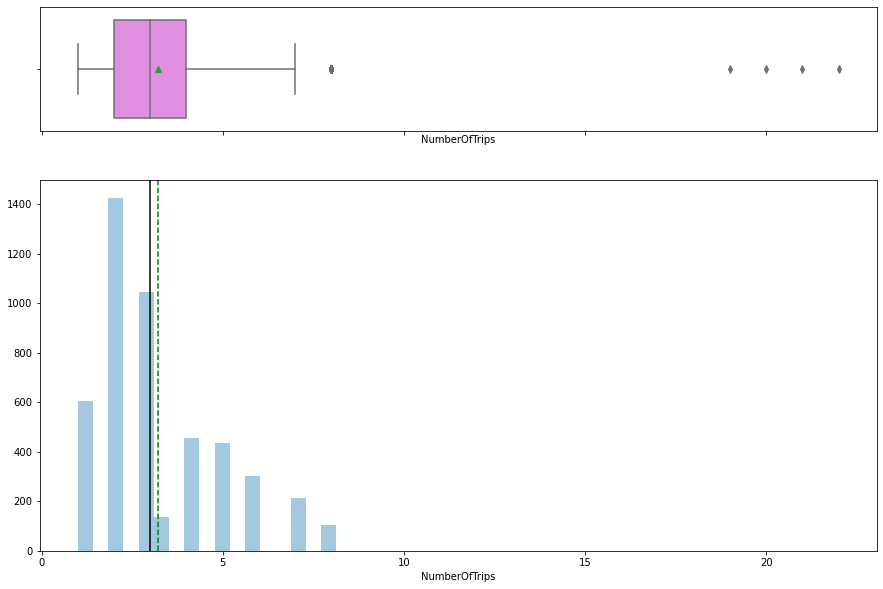

In [21]:
histogram_boxplot(data['NumberOfTrips'])

- "NumberOfTrips" is excessively skewed to the right and there are multiple extreme outliers requiring attention.  In the next step these will be addressed to better prepare the data for model use.

In [22]:
Q1=data['NumberOfTrips'].quantile(0.25)
Q3=data['NumberOfTrips'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)
data = data[data['NumberOfTrips']< Upper_Whisker]
data = data[data['NumberOfTrips']> Lower_Whisker]

2.0
4.0
2.0
-1.0 7.0


- Utilized the above algorithm to remove the outliers and better balance the distribution.  This algorithm is reused within the Notebook to ensure consistency and accuracy.  "NumberOfTrips" is now better but continues to have a slight right skew.

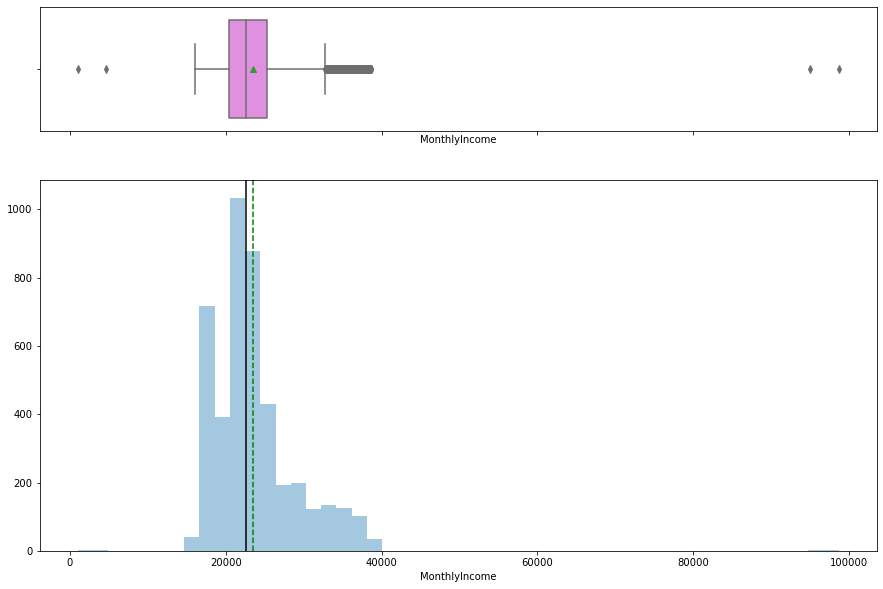

In [23]:
histogram_boxplot(data['MonthlyIncome'])

- "MonthlyIncome" is skewed to the right and there are multiple extreme outliers requiring attention.  In the next step these will be addressed to better prepare the data for model use.

In [24]:
Q1=data['MonthlyIncome'].quantile(0.25)
Q3=data['MonthlyIncome'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)
data = data[data['MonthlyIncome']< Upper_Whisker]
data = data[data['MonthlyIncome']> Lower_Whisker]

20380.0
25330.75
4950.75
12953.875 32756.875


- Utilized the above algorithm to remove the outliers and better balance the distribution.  This algorithm is reused within the Notebook to ensure consistency and accuracy.  "MonthlyIncome" is now better but continues to have a slight right skew.

**Function to create barplots that indicate percentage for each category**

In [25]:
def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(15,7)})
    ax=sns.countplot(x=feature, data=data)
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.25 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
        
    plt.show() # show the plot

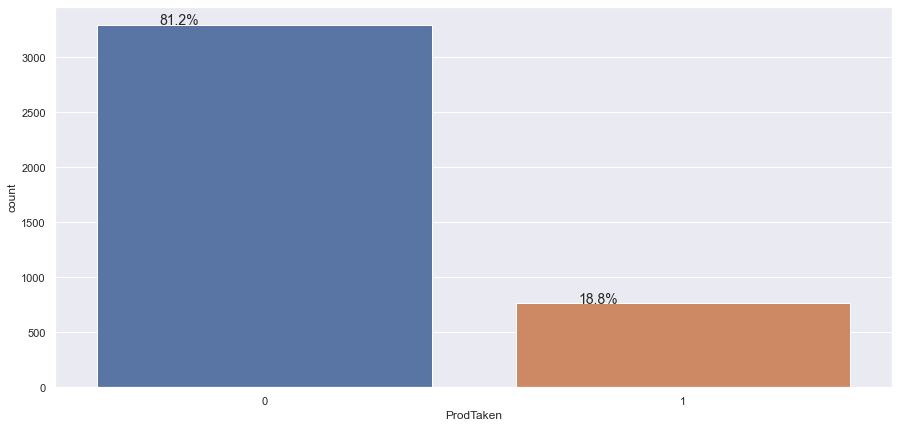

In [26]:
perc_on_bar(data['ProdTaken'])

- 18.8% of customers signed up for the travel package and 81.2% passing on the opportunity.
- Recommend a more focused approach to increase numbers.

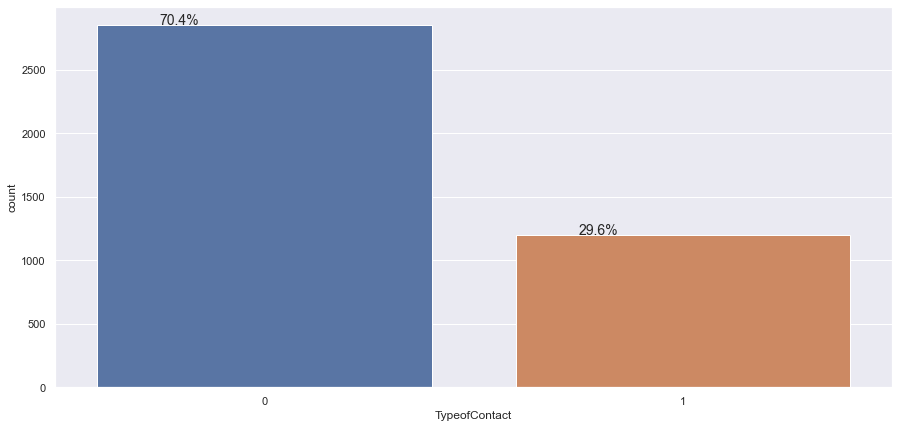

In [27]:
perc_on_bar(data['TypeofContact'])

- 70.4% of customers were Company Invited and 29.6% were Self Enquiry.

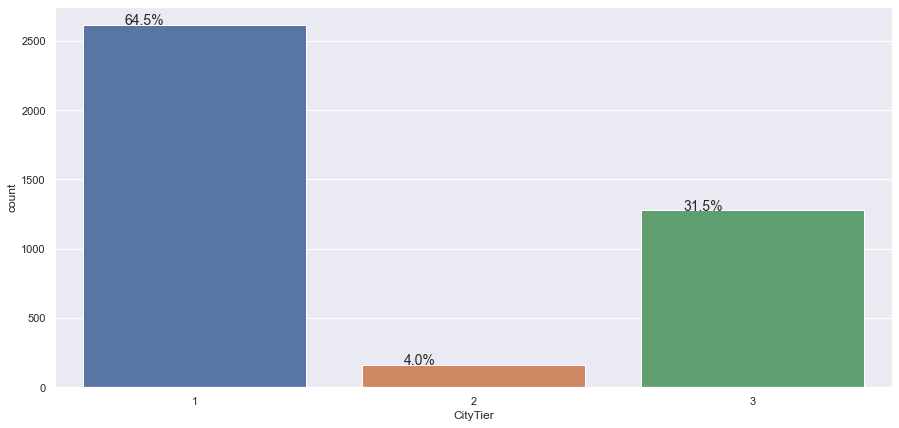

In [28]:
perc_on_bar(data['CityTier'])

- 64.5% were City Tier 1, 4% were City Tier 2, and 31.5% were Tier 3.

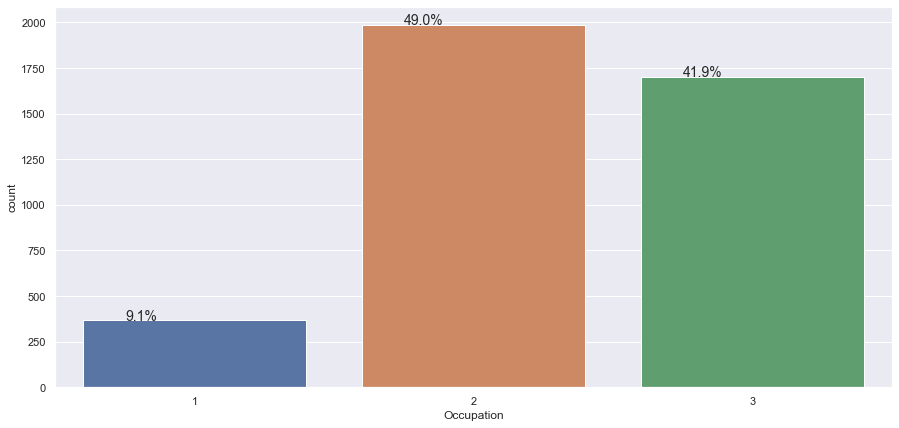

In [29]:
perc_on_bar(data['Occupation'])

9.1% were Large Business, 49% were Salaried, and 41.9% were Small Business.

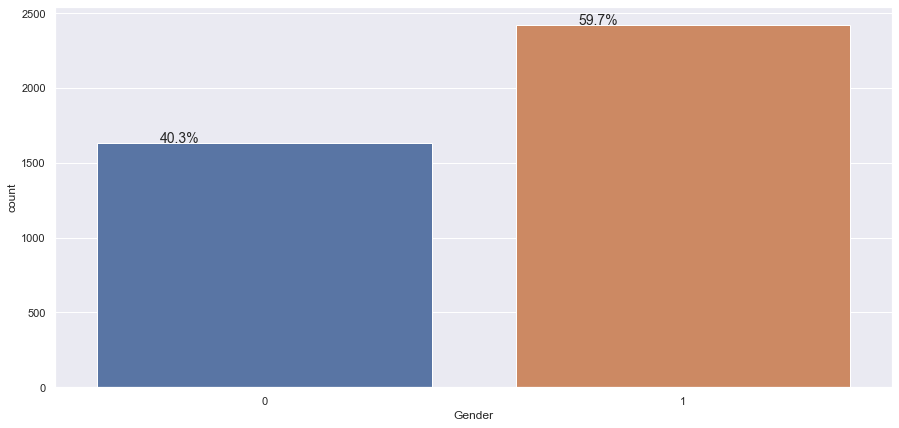

In [30]:
perc_on_bar(data['Gender'])

40.3% were Female and 59.7% were Male.

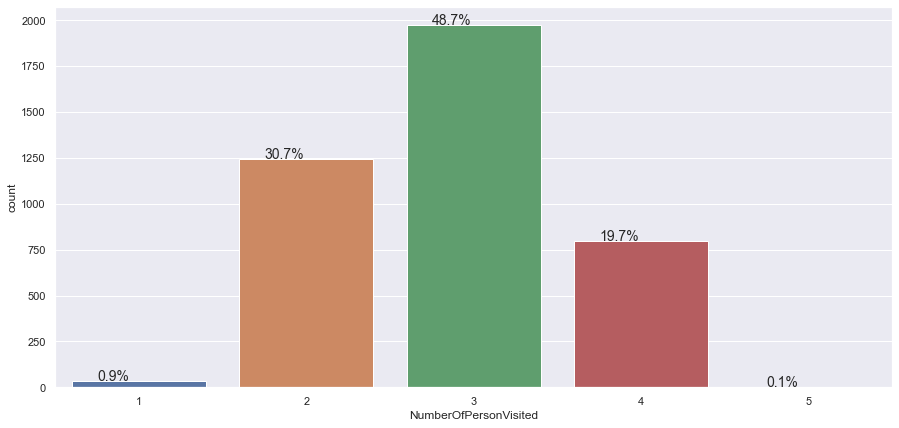

In [31]:
perc_on_bar(data['NumberOfPersonVisited'])

- 0.9% was 1 person, 30.7% was two people, 48.7% was three people, 19.7% was four people, and 0.1% was five people.

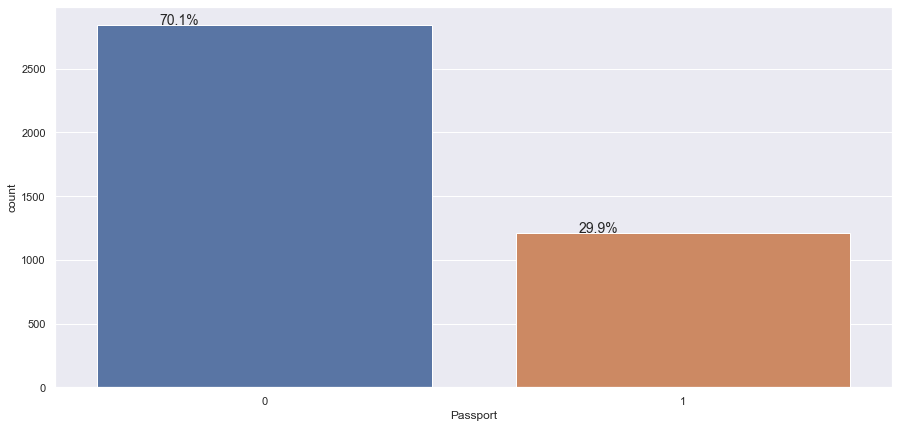

In [32]:
perc_on_bar(data['Passport'])

- 70.1% had a passport and 29.9% did not have a passport.

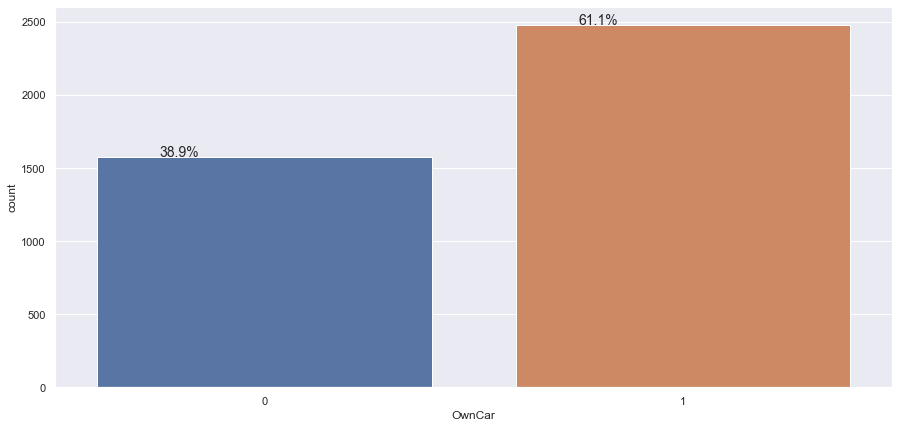

In [33]:
perc_on_bar(data['OwnCar'])

- 38.9% did own a car and 61.1% did not own a car.

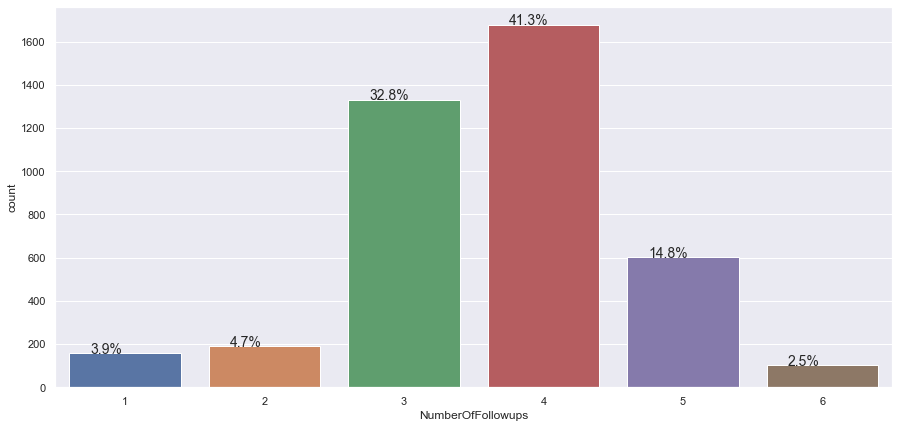

In [34]:
perc_on_bar(data['NumberOfFollowups'])

- 3.9% had one follow-up, 4.7% had two follow-ups, 32.8% had three follow-ups, 41.3% had four follow-ups, 14.8% had five follow-ups, and 2.5% had five follow-ups.

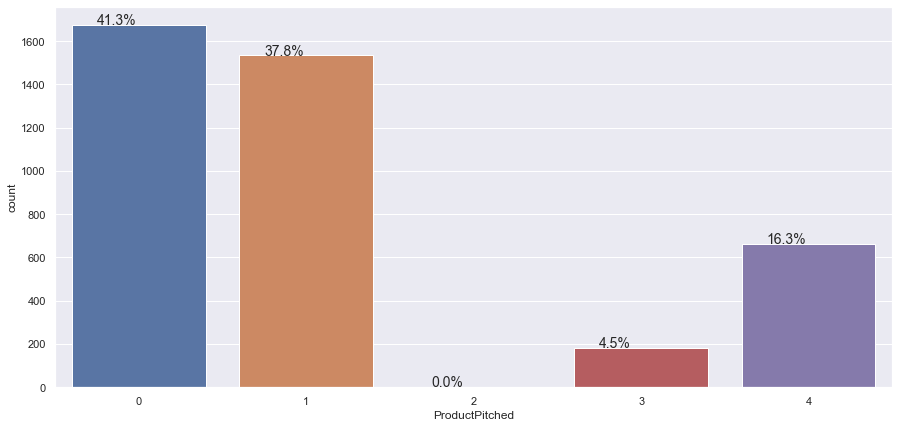

In [35]:
perc_on_bar(data['ProductPitched'])

- 41.3% were pitched the Basic Package, 37.8% were pitched the Deluxe Package, 0% were pitched the King Package, 4.5% were pitched the Super Deluxe Package, and 16.3% were pitched the Standard Package.

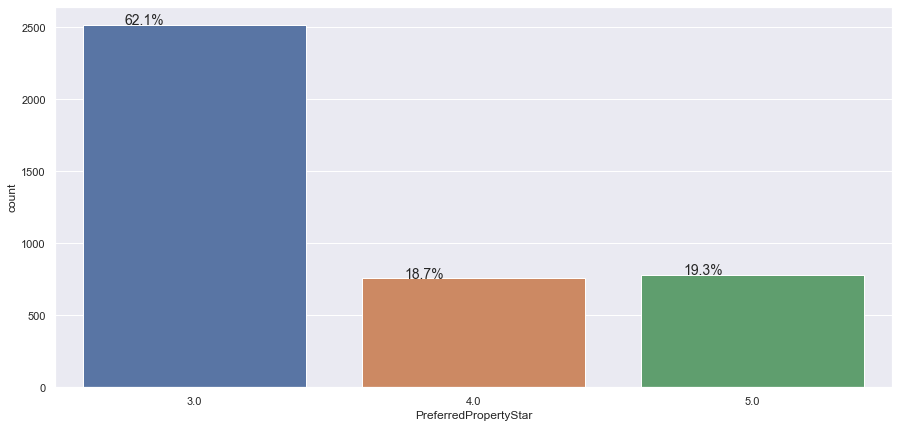

In [36]:
perc_on_bar(data['PreferredPropertyStar'])

- 62.1% preferred three stars, 18.7% preferred four stars, and 19.3% preferred five stars.

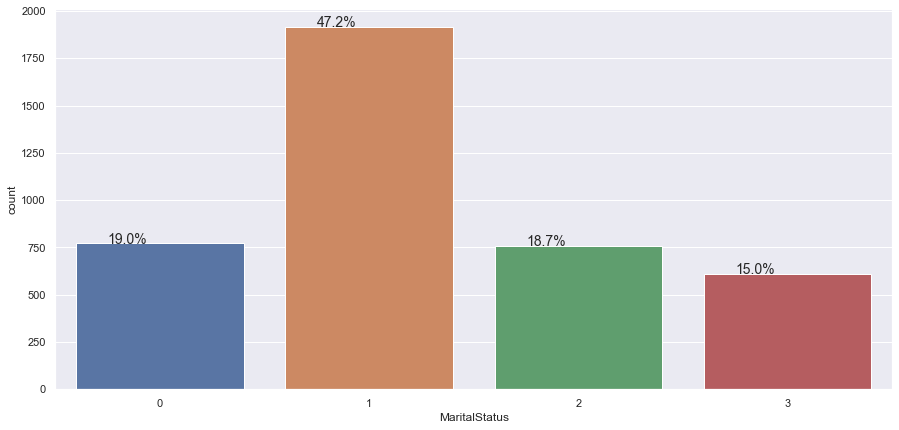

In [37]:
perc_on_bar(data['MaritalStatus'])

- 19% were Divorced, 47.2% were Married, 18.7% were Single, and 15% were Unmarried.

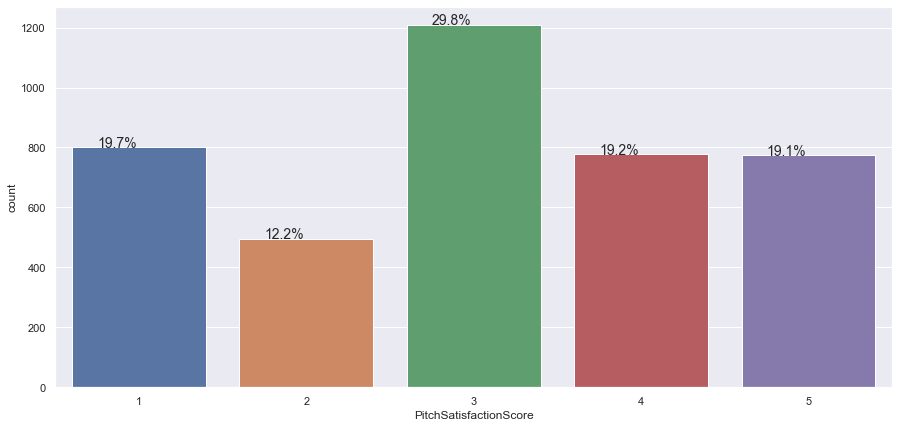

In [38]:
perc_on_bar(data['PitchSatisfactionScore'])

- 19.7% provided a one score, 12.2% provided a two score, 29.8% provided a three score, 19.2% provided a four score, and 19.1% provied a five score.

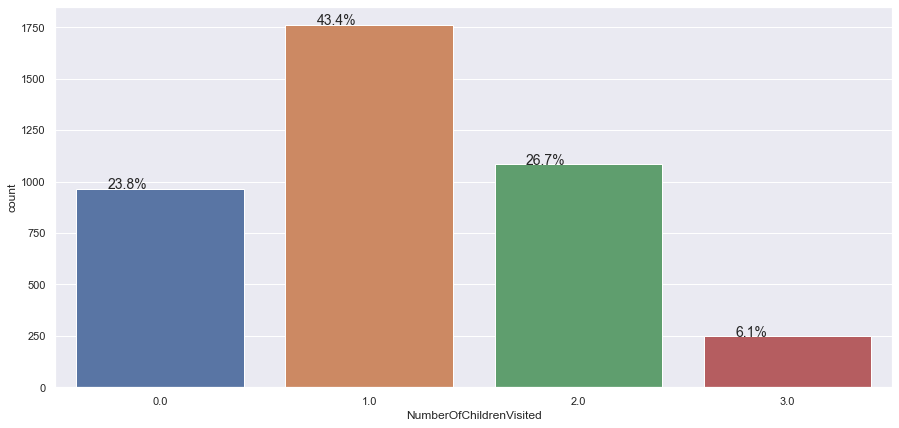

In [39]:
perc_on_bar(data['NumberOfChildrenVisited'])

- 23.8% had zero children, 43.4% had one child, 26.7% had two children, and 6.1% had three children.

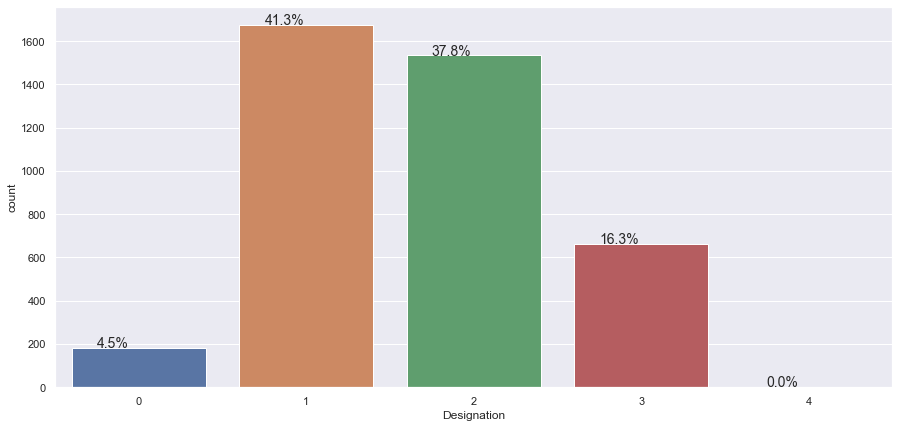

In [40]:
perc_on_bar(data['Designation'])

- 4.5% were AVP, 41.4% were Executive, 37.8% were Managers, 16.3% were Senior Managers, and 0% were VPs.

### Bivariate analysis

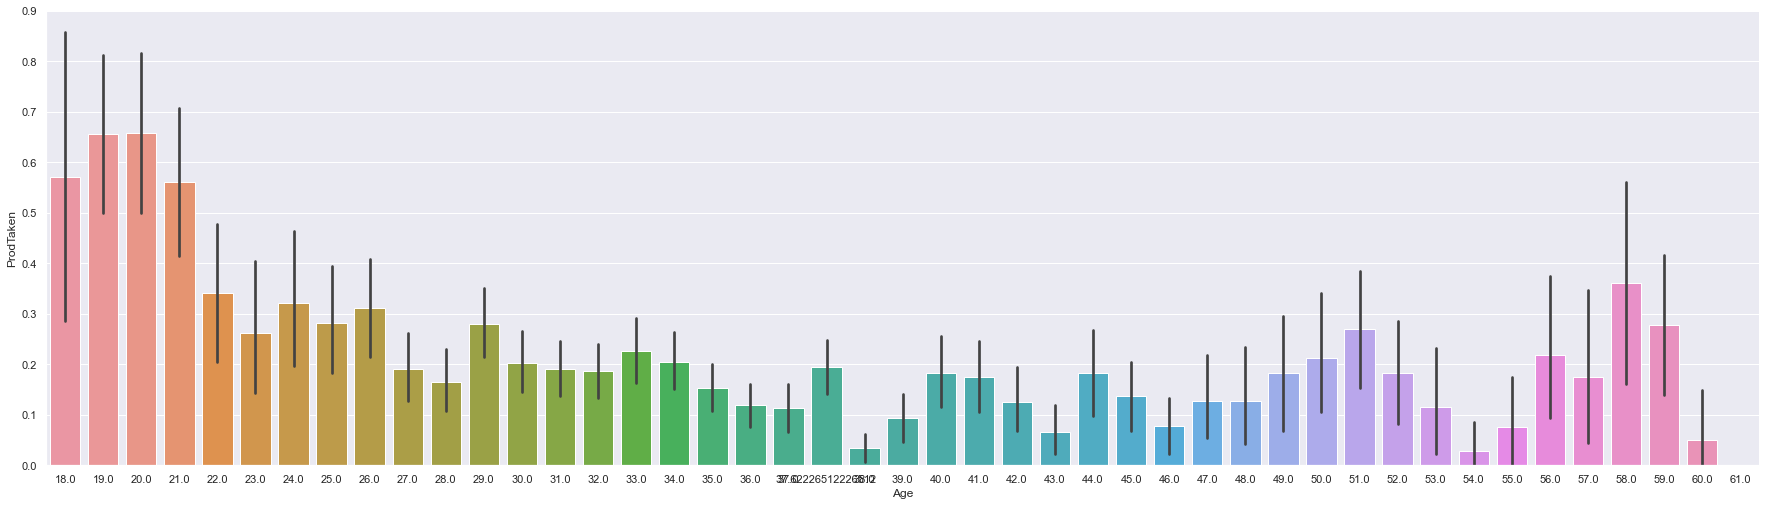

In [41]:
sns.catplot(x="Age", y="ProdTaken", data=data, kind='bar', height=7, aspect=3.5, estimator=np.mean);

- Data indicates younger adults are more prone to buying travel packages but tapper off as they get older.  Likewise, older adults purchase travel packages starting in their 50s.

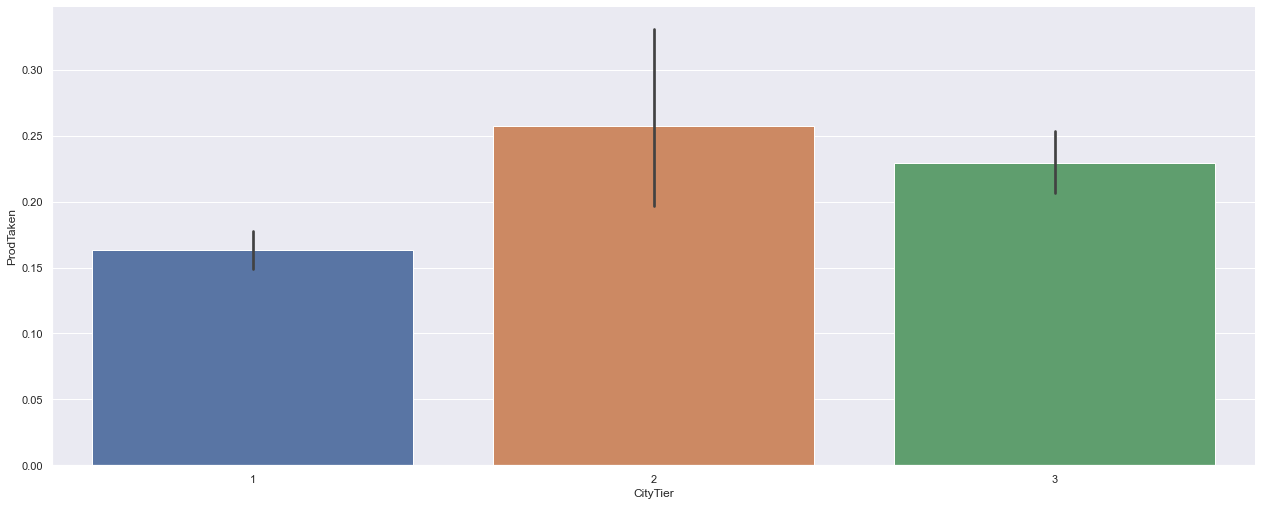

In [42]:
sns.catplot(x="CityTier", y="ProdTaken", data=data, kind='bar', height=7, aspect=2.5, estimator=np.mean);

- City Tier one and two are relatively the same and City Tier 1 is slightly lesss.  Unsure if this data point will provide much value.

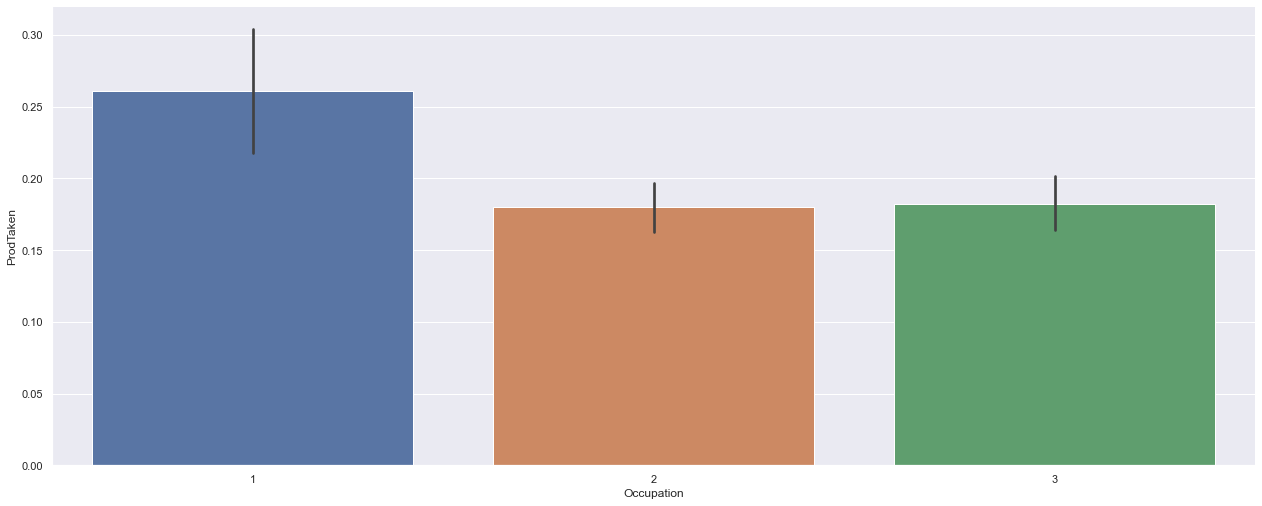

In [43]:
sns.catplot(x="Occupation", y="ProdTaken", data=data, kind='bar', height=7, aspect=2.5, estimator=np.mean);

- Data indicates that Free Lancers are more prone to purchase travel packages followed by Large Businesses.  Salaried and Small Business owners are less likely to purchase travel packages.

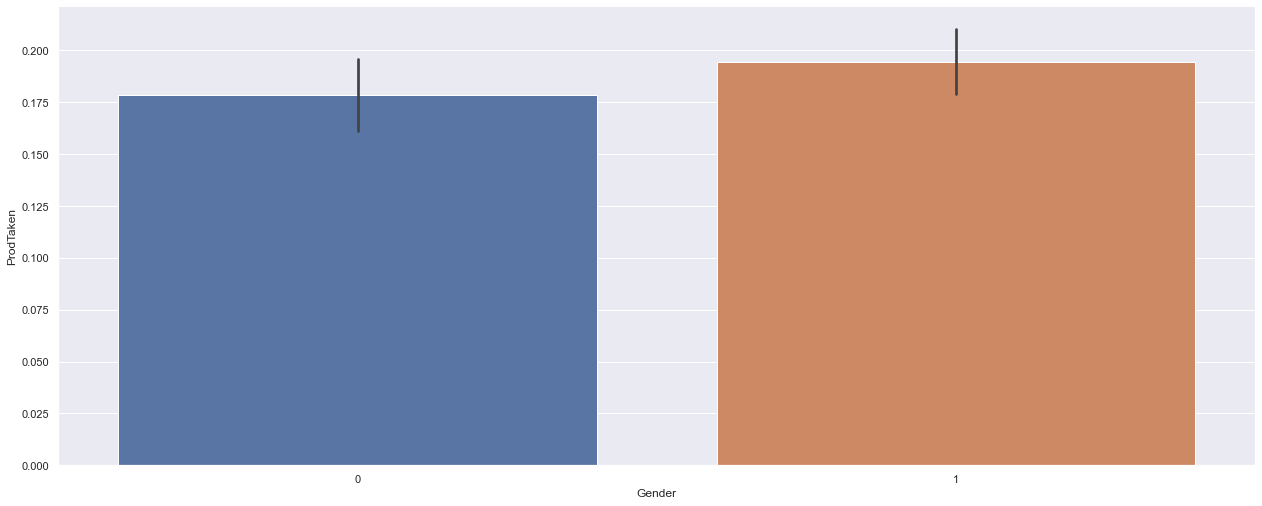

In [44]:
sns.catplot(x="Gender", y="ProdTaken", data=data, kind='bar', height=7, aspect=2.5, estimator=np.mean);

- Male customers are more likely to purchase travel packages than Females but the data points are too close to make a substantial marketing decision.

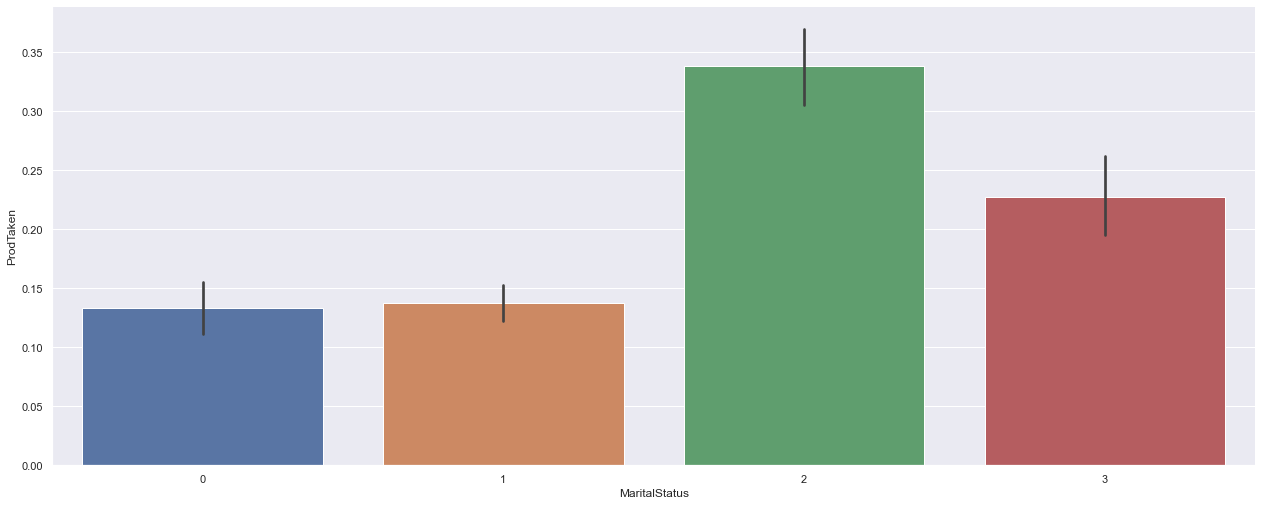

In [45]:
sns.catplot(x="MaritalStatus", y="ProdTaken", data=data, kind='bar', height=7, aspect=2.5, estimator=np.mean);

- Single customers and unmarried customers are most likely to purchase travel packages with Single customers leading the way.  Divorced and Married customers are less likely to buy but still represent a decent volumn of customer to purchase travel packages.

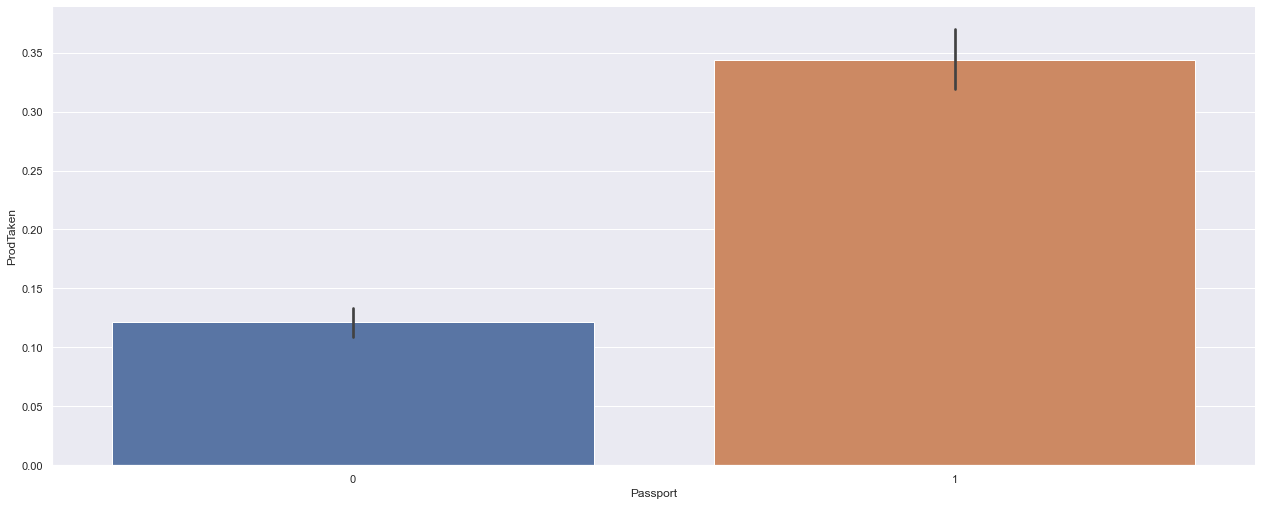

In [46]:
sns.catplot(x="Passport", y="ProdTaken", data=data, kind='bar', height=7, aspect=2.5, estimator=np.mean);

- Customers that have passports are almost three times more likely to purchase travel packages than customers that do not possess a passport.

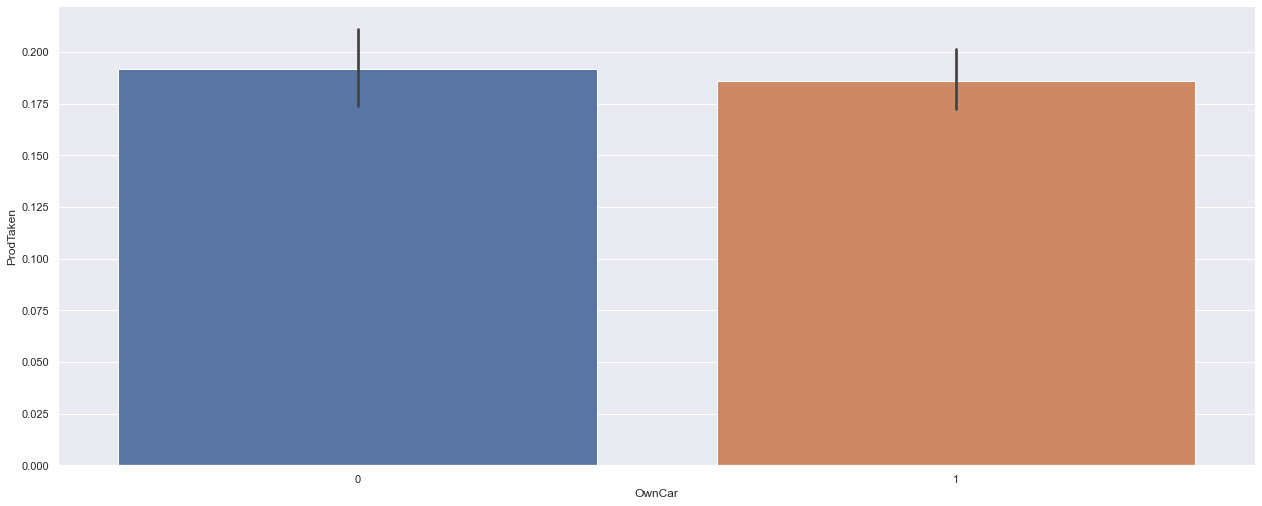

In [47]:
sns.catplot(x="OwnCar", y="ProdTaken", data=data, kind='bar', height=7, aspect=2.5, estimator=np.mean);

- Customers that do not own are car lead in the volume to buy travel packages but customers that do own are car are almost even.  The numbers between these two data points appears to be too close to be of use during analysis.

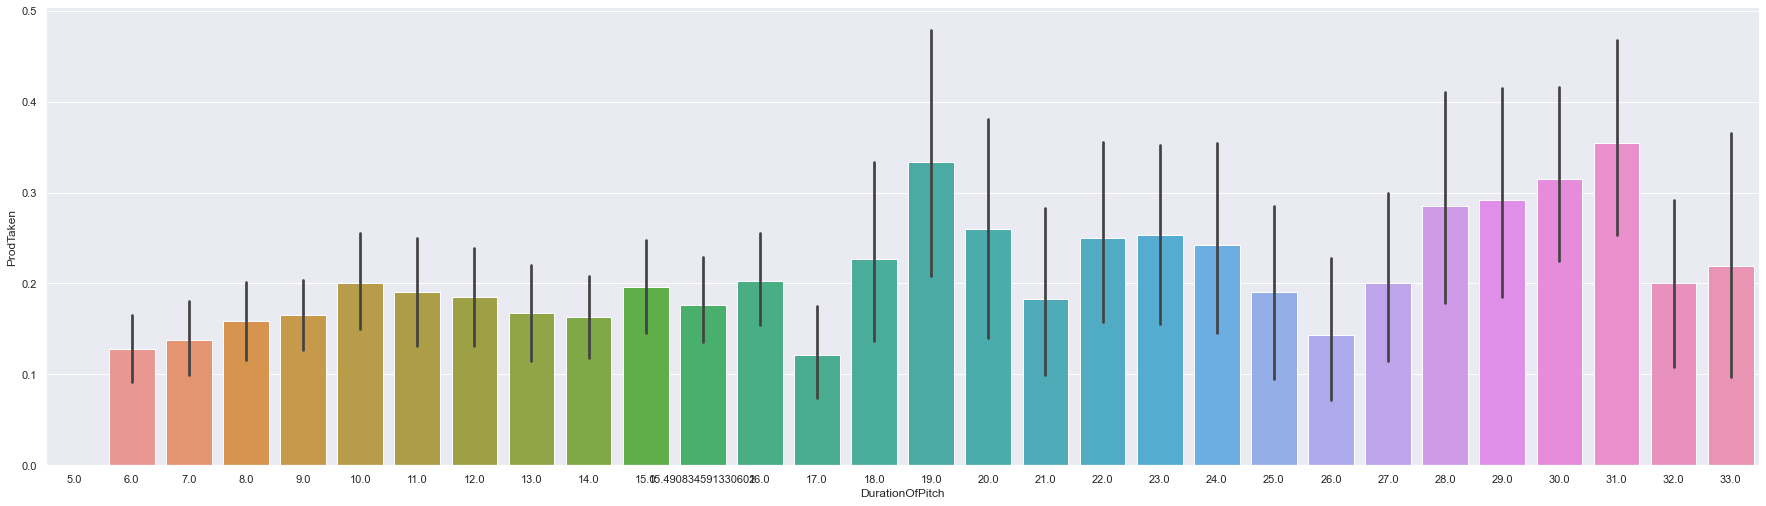

In [48]:
sns.catplot(x="DurationOfPitch", y="ProdTaken", data=data, kind='bar', height=7, aspect=3.5, estimator=np.mean);

- We can see the ideal "DurationOfPitche is roughly 19 and 31 minutes.  Pitches under 19 minutes are less productive as pitches and pitches over 36 minutes are not productive.

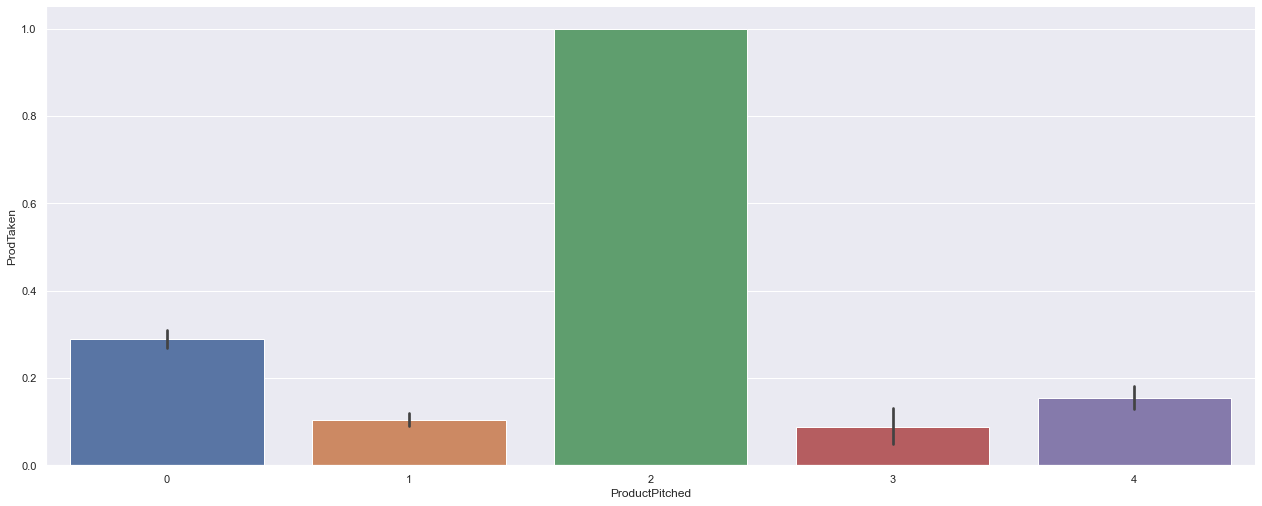

In [49]:
sns.catplot(x="ProductPitched", y="ProdTaken", data=data, kind='bar', height=7, aspect=2.5, estimator=np.mean);

- We can see the Basic Package is desired almost by double compared to the Standard Package.  The King and Deluxe are 1/3 desirable as compared to the Basic Package.

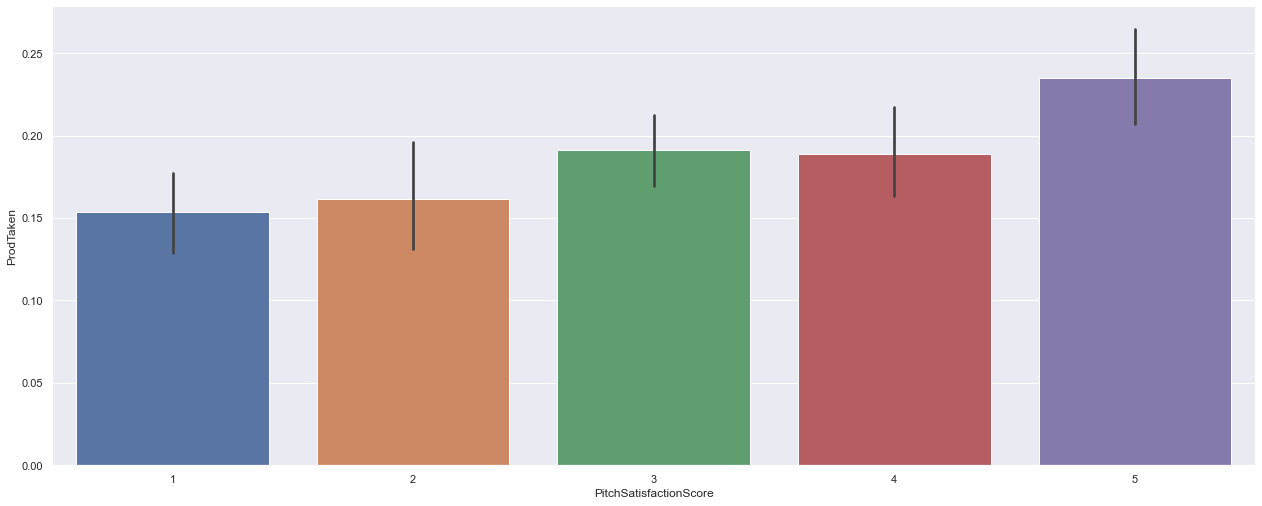

In [50]:
sns.catplot(x="PitchSatisfactionScore", y="ProdTaken", data=data, kind='bar', height=7, aspect=2.5, estimator=np.mean);

- We can see that Pitch Satisfaction scores of five and three are the most desired slightly followed lower by a score of four.  Scores of one and two are as anticipated the least desirable.

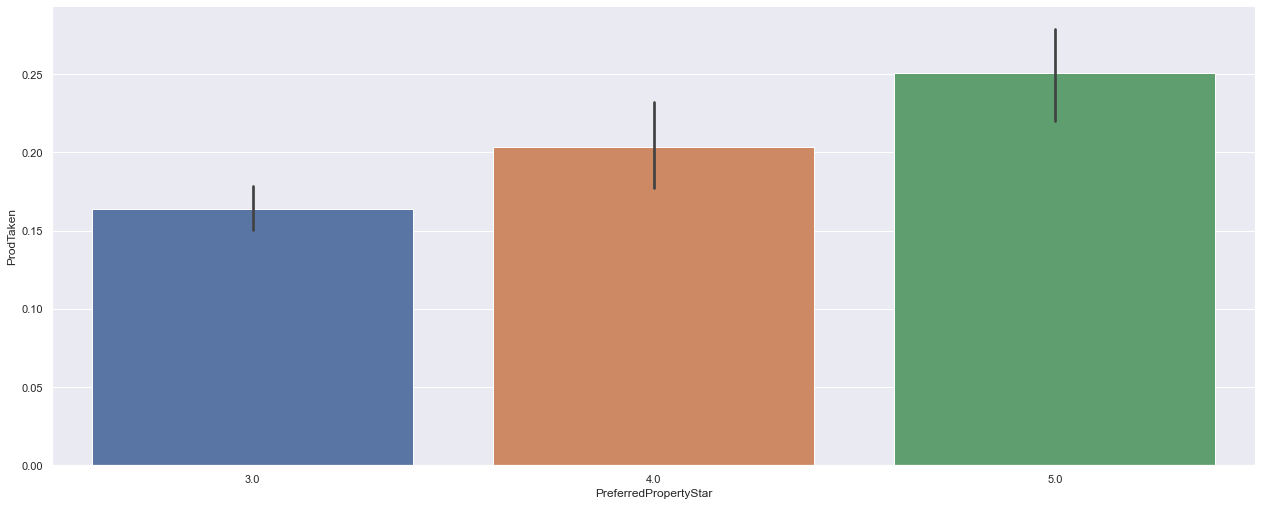

In [51]:
sns.catplot(x="PreferredPropertyStar", y="ProdTaken", data=data, kind='bar', height=7, aspect=2.5, estimator=np.mean);

- As expected Preferred Property Scores are five as most desired, four as next most desired and three as the least desirable.

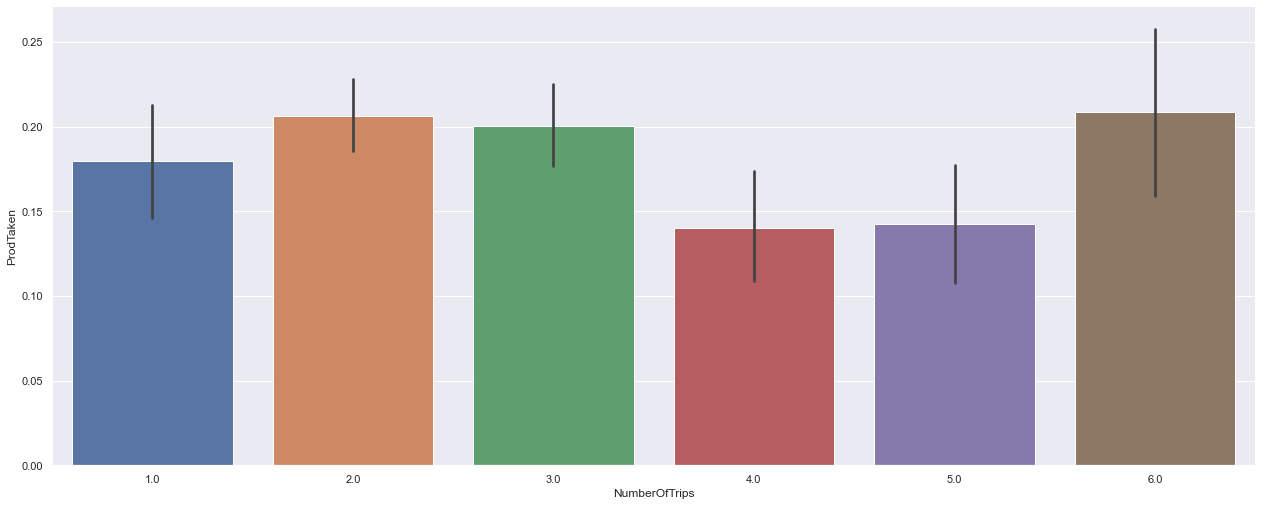

In [52]:
sns.catplot(x="NumberOfTrips", y="ProdTaken", data=data, kind='bar', height=7, aspect=2.5, estimator=np.mean);

- The data indicates that customers who take more trips are more likely to purchase travel packages.  Specifcally, trips between 19 and 20 garner the most return customers.

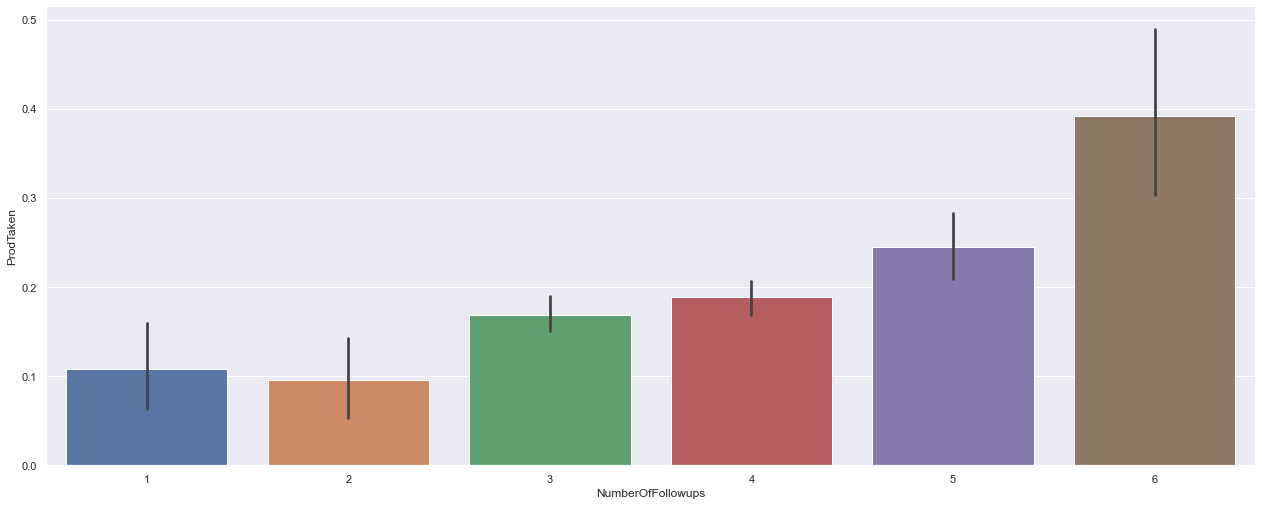

In [53]:
sns.catplot(x="NumberOfFollowups", y="ProdTaken", data=data, kind='bar', height=7, aspect=2.5, estimator=np.mean);

- The data indicates that the more follow-up the greater the possibility of the customer purchasing a travel package.  The numbers significantly improve and it is recommended to follow-up at least five times.

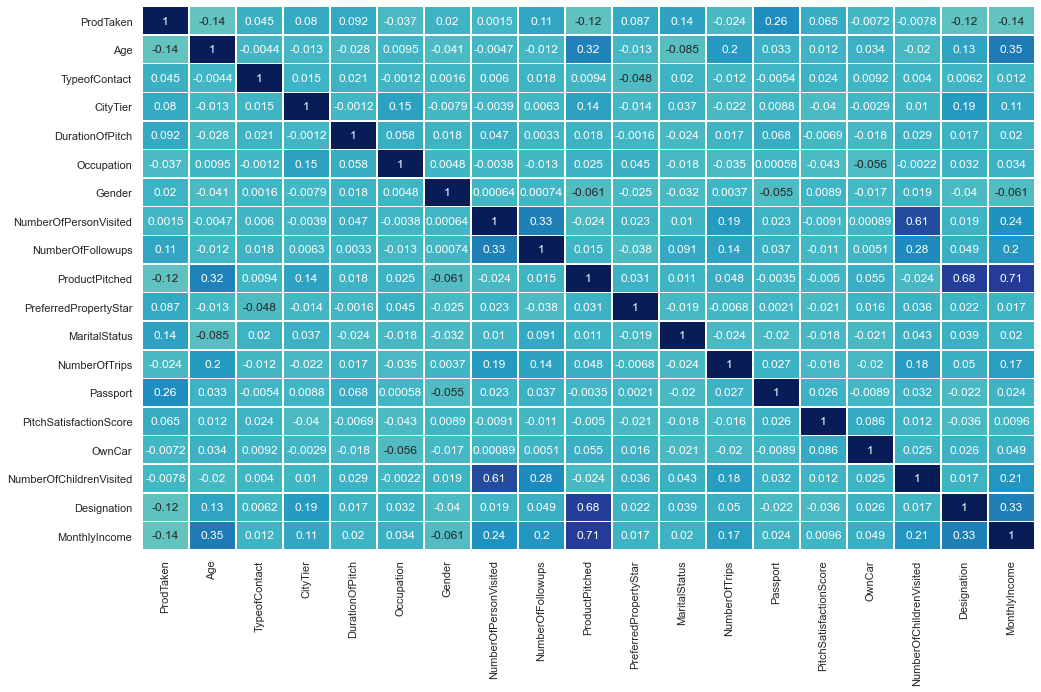

In [54]:
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

- We can see that temperature and feel like temperature are almost evenly correlated
- Monthly Income and Product Pitched have moderate positive correlation
- Product Pitched and Designation have a moderate positive correlation
- Number of Person Visited and Number of Children Visited have a moderate positive correlation

### Splitting Data

In [55]:
# Separating features and the target column
X = data.drop('ProdTaken', axis=1)
y = data['ProdTaken']

In [56]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, shuffle=True)

In [57]:
X_train.shape, X_test.shape

((2839, 18), (1217, 18))

- We have 2839, 18 observations in the train set and 1217, 18 observations in the test set.

## <a id = "link5"></a>5. Model building - Bagging - Build bagging classifier, random forest, and decision tree            (4 points)

In [58]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_r2=metrics.r2_score(y_train,pred_train)
    test_r2=metrics.r2_score(y_test,pred_test)
    train_rmse=np.sqrt(metrics.mean_squared_error(y_train,pred_train))
    test_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_test))
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-sqaure on training set : ",metrics.r2_score(y_train,pred_train))
        print("R-square on test set : ",metrics.r2_score(y_test,pred_test))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train,pred_train)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test,pred_test)))
    
    # returning the list with train and test scores
    return score_list

In [59]:
dtree=DecisionTreeRegressor(random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=1)

In [60]:
dtree_score=get_model_score(dtree)

R-sqaure on training set :  1.0
R-square on test set :  0.27722649773576513
RMSE on training set :  0.0
RMSE on test set :  0.34398218982768924


- R-square score for training is overfitting and R-square for trainng is way underperforming.  Will attempt to resolve in Hyperparameter Tuning.  RMSE training and test also are off.  Someting appears to be wrong possibly with the dataset.

### Hyperparameter Tuning

In [61]:
# Choose the type of classifier. 
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': list(np.arange(2,20)) + [None], 
              'min_samples_leaf': [1, 3, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10, 15] + [None],
              'min_impurity_decrease': [0.001, 0.01, 0.1, 0.0]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=1)

In [62]:
dtree_tuned_score=get_model_score(dtree_tuned)

R-sqaure on training set :  0.7343256249428443
R-square on test set :  0.23452488714988773
RMSE on training set :  0.19817214648923914
RMSE on test set :  0.3539976536391374


- The overfitting is reduced after hyperparameter tuning and the training/test data are closer.  Unfortunately, the gap between these scores is still significant.
- RMSE scores also improved and hyperparameter tuning changes were positive.  Work still remains to improve these overall scores.

**Plotting the feature importance of each variable**

In [63]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                              Imp
Age                      0.172187
DurationOfPitch          0.125963
MonthlyIncome            0.104439
ProductPitched           0.090741
Passport                 0.090434
PitchSatisfactionScore   0.071540
MaritalStatus            0.048341
PreferredPropertyStar    0.045386
CityTier                 0.044892
NumberOfTrips            0.037216
Occupation               0.036383
Gender                   0.035995
NumberOfFollowups        0.030117
OwnCar                   0.021289
NumberOfChildrenVisited  0.014252
TypeofContact            0.014150
NumberOfPersonVisited    0.009515
Designation              0.007159


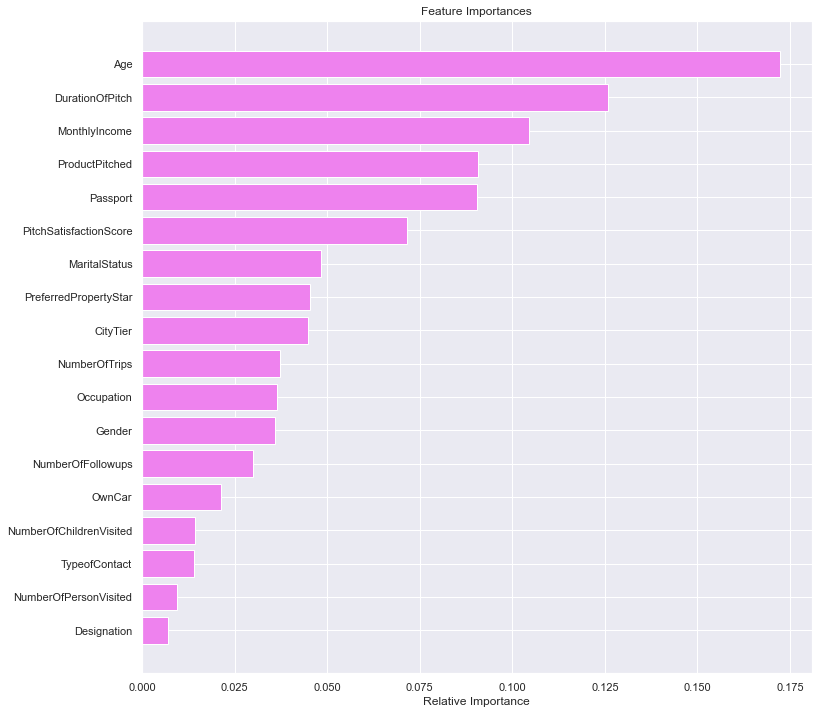

In [64]:
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Age is the most important feature, in addition to DurationOfPitch and MonthlyIncome, for tuned decision tree model

In [65]:
rf_estimator=RandomForestRegressor(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [66]:
rf_estimator_score=get_model_score(rf_estimator)

R-sqaure on training set :  0.9426402018089278
R-square on test set :  0.5576716512830664
RMSE on training set :  0.0920813307290194
RMSE on test set :  0.26909599414963203


- The Random Forest is giving a training score of .94 and testing score of .55.  These numbers are not sufficient at this point so we will attempt to reduce this overfitting by hyperparameter tuning below.

### Hyperparameter Tuning

In [67]:
# Choose the type of classifier. 
rf_tuned = RandomForestRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {  
                'max_depth':[4, 6, 8, 10, None],
                'max_features': ['sqrt','log2',None],
                'n_estimators': [80, 90, 100, 110, 120]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_features=None, n_estimators=110, random_state=1)

In [68]:
rf_tuned_score=get_model_score(rf_tuned)

R-sqaure on training set :  0.942767966582998
R-square on test set :  0.5574634224936574
RMSE on training set :  0.09197872132857199
RMSE on test set :  0.26915932599381337


- No significant change in the result. The result is almost same before or after the hyperparameter tuning.

In [69]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                              Imp
Age                      0.152117
MonthlyIncome            0.135051
DurationOfPitch          0.125284
ProductPitched           0.072195
Passport                 0.066617
PitchSatisfactionScore   0.064393
NumberOfTrips            0.051239
NumberOfFollowups        0.049325
MaritalStatus            0.049213
CityTier                 0.042159
Occupation               0.036624
PreferredPropertyStar    0.035213
NumberOfChildrenVisited  0.023510
NumberOfPersonVisited    0.021798
Gender                   0.021775
TypeofContact            0.021011
OwnCar                   0.018009
Designation              0.014468


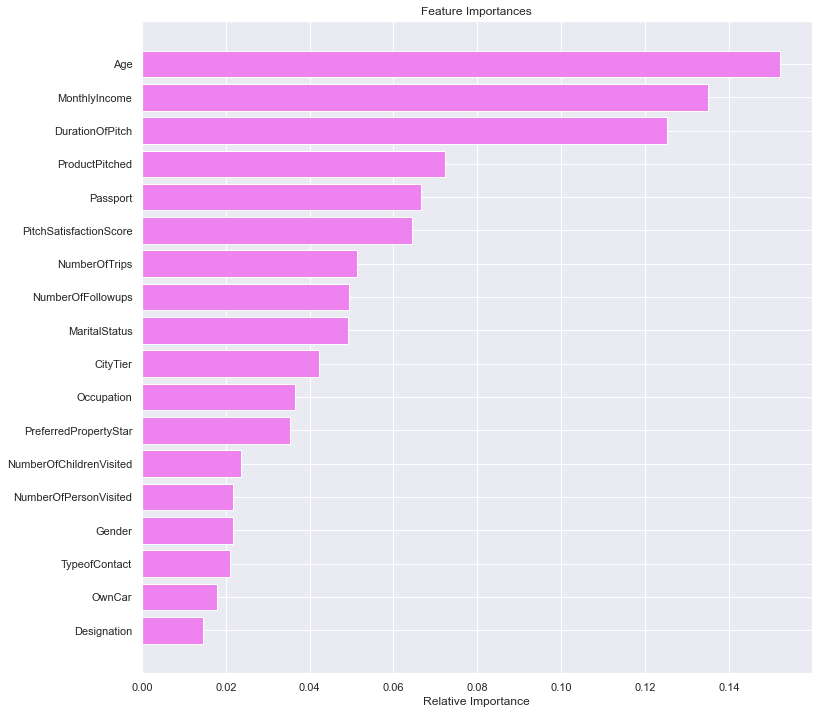

In [70]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Age is the most important feature, in addition to MonthlyIncome and Duration Of Pitch for Random Forest Regressor model

## <a id = "link6"></a>6. Model performance improvement - Bagging - Comment on which metric is right for model performance evaluation and why? - Comment on model performance - Can model performance be improved? check and comment (9 points)

## <a id = "link7"></a>7. Model building - Boosting - Build Adaboost, gradient boost, xgboost, and stacking classifier (6 points)

### AdaBoost Regressor

In [71]:
ab_regressor=AdaBoostRegressor(random_state=1)
ab_regressor.fit(X_train,y_train)

AdaBoostRegressor(random_state=1)

In [72]:
ab_regressor_score=get_model_score(ab_regressor)

R-sqaure on training set :  0.17550848190822
R-square on test set :  0.1600647925010369
RMSE on training set :  0.34910886389543105
RMSE on test set :  0.37081537997211944


- AdaBoost is performing poorly accross both R-Square train/test and RMSE train/test.  The score are well coupled between train/test but overall these scores are not sufficient for use.  

### Hyperparameter Tuning

In [73]:
# Choose the type of classifier. 
ab_tuned = AdaBoostRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10,100,10), 
              'learning_rate': [1, 0.1, 0.5, 0.01],
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
ab_tuned.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.01, n_estimators=60, random_state=1)

In [74]:
ab_tuned_score=get_model_score(ab_tuned)

R-sqaure on training set :  0.21547953676091303
R-square on test set :  0.19505495735977418
RMSE on training set :  0.34054140041585274
RMSE on test set :  0.3630094749495691


- We can see that there is no significant improvement in the model after hyperparameter tuning but the test/training continue to be closely coupled.

In [75]:
# importance of features in the tree building

print(pd.DataFrame(ab_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                              Imp
Passport                 0.336498
ProductPitched           0.208009
Age                      0.191792
MaritalStatus            0.064201
CityTier                 0.052606
MonthlyIncome            0.032322
PitchSatisfactionScore   0.026812
PreferredPropertyStar    0.024677
DurationOfPitch          0.022697
Occupation               0.022246
NumberOfFollowups        0.009569
TypeofContact            0.003039
NumberOfPersonVisited    0.002094
NumberOfChildrenVisited  0.001023
NumberOfTrips            0.000835
Designation              0.000801
Gender                   0.000781
OwnCar                   0.000000


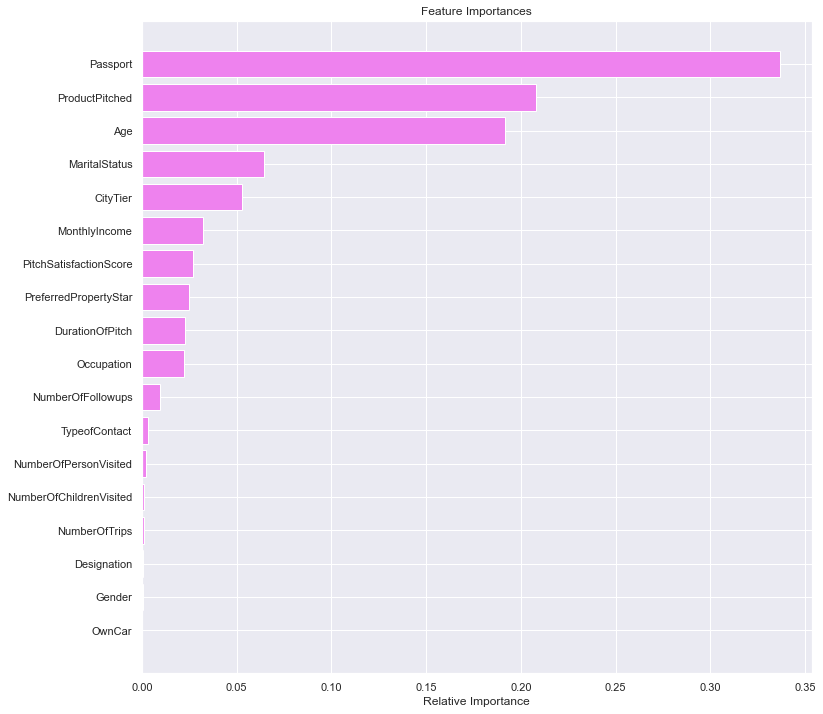

In [76]:
feature_names = X_train.columns
importances = ab_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Passport is the most important feature, in addition to Product Pitched and Age for ADA Boost

### Gradient Boosting Regressor

In [77]:
gb_estimator=GradientBoostingRegressor(random_state=1)
gb_estimator.fit(X_train,y_train)

GradientBoostingRegressor(random_state=1)

In [78]:
gb_estimator_score=get_model_score(gb_estimator)

R-sqaure on training set :  0.44814805401848146
R-square on test set :  0.29736240317312135
RMSE on training set :  0.2856137219740477
RMSE on test set :  0.33915680697241907


- Gradient boosting scores are not good for R-Square test/train.  Will attempt hyperparameter to attempt to improve the scores.

### Hyperparameter Tuning

In [79]:
# Choose the type of classifier. 
gb_tuned = GradientBoostingRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,200,25), 
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=10, max_features=0.7, n_estimators=175,
                          random_state=1, subsample=0.9)

In [80]:
gb_tuned_score=get_model_score(gb_tuned)

R-sqaure on training set :  0.9999851456939813
R-square on test set :  0.6292588542440953
RMSE on training set :  0.0014818149189824443
RMSE on test set :  0.246360025063009


- The model has improved significantly in R-Square and RMSE score is slightly better.

In [81]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(gb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                              Imp
Age                      0.152611
MonthlyIncome            0.131890
DurationOfPitch          0.129602
PitchSatisfactionScore   0.075386
Passport                 0.071963
NumberOfTrips            0.048831
NumberOfFollowups        0.045979
MaritalStatus            0.045418
ProductPitched           0.043948
PreferredPropertyStar    0.043714
Occupation               0.039849
CityTier                 0.036825
Designation              0.029087
Gender                   0.025146
TypeofContact            0.024196
NumberOfPersonVisited    0.023218
OwnCar                   0.016678
NumberOfChildrenVisited  0.015661


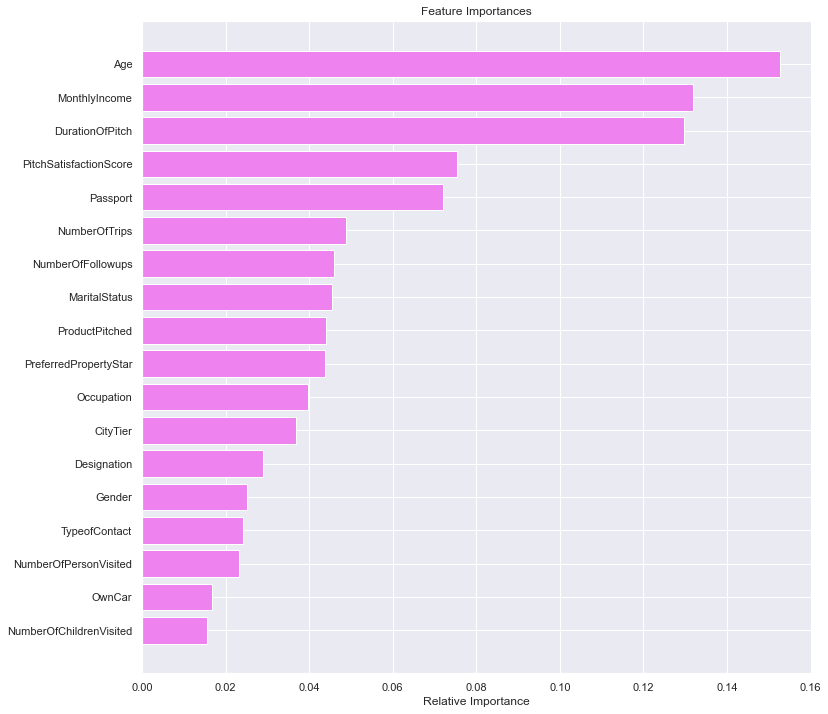

In [82]:
feature_names = X_train.columns
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Age is the most important feature, in addition to Monthly Income and Duration Of Pitch for Gradient Boosting Regressor

### XGBoost Regressor

In [83]:
xgb_estimator=XGBRegressor(random_state=1)
xgb_estimator.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=1, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [84]:
xgb_estimator_score=get_model_score(xgb_estimator)

R-sqaure on training set :  0.971952689140177
R-square on test set :  0.5235695905352629
RMSE on training set :  0.06438925401802362
RMSE on test set :  0.27927662184840146


- XGBoost Regressor and Gradient Boosting Model are showing similar results.  R-Square continues to show gap between train/test scores.

### Hyperparameter Tuning

In [85]:
# Choose the type of classifier. 
xgb_tuned = XGBRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': [75,100,125,150], 
              'subsample':[0.7, 0.8, 0.9, 1],
              'gamma':[0, 1, 3, 5],
              'colsample_bytree':[0.7, 0.8, 0.9, 1],
              'colsample_bylevel':[0.7, 0.8, 0.9, 1]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
xgb_tuned.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=1, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [86]:
xgb_tuned_score=get_model_score(xgb_tuned)

R-sqaure on training set :  0.9900181793676699
R-square on test set :  0.5293361728369932
RMSE on training set :  0.03841250770630443
RMSE on test set :  0.2775813327928952


- Scores have changed very little after hyperparameter tuning.

In [87]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                              Imp
ProductPitched           0.150258
Passport                 0.149500
CityTier                 0.062048
PreferredPropertyStar    0.060335
Gender                   0.059908
TypeofContact            0.057144
MaritalStatus            0.056867
DurationOfPitch          0.054583
PitchSatisfactionScore   0.051214
NumberOfFollowups        0.043600
Age                      0.042553
Occupation               0.042039
NumberOfTrips            0.040964
MonthlyIncome            0.037058
NumberOfPersonVisited    0.034632
Designation              0.020770
OwnCar                   0.018459
NumberOfChildrenVisited  0.018068


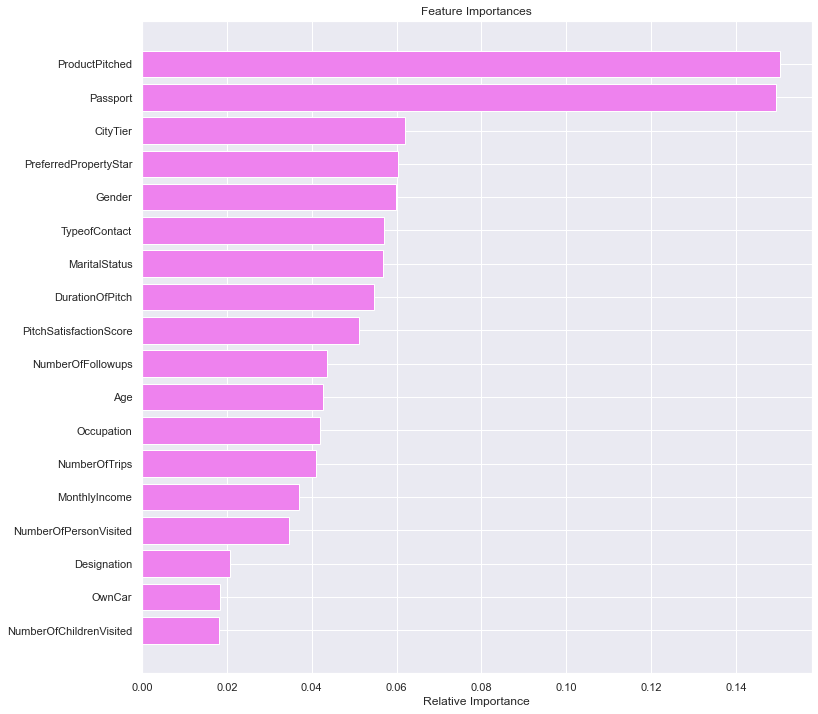

In [88]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Product Pitched is the most important feature, in addition to Passport and City Tier for XGBoost Regressor

**Now, let's build a stacking model with the tuned models - decision tree, random forest and gradient boosting, then use XGBoost to get the final prediction.**

In [89]:
estimators=[('Decision Tree', dtree_tuned),('Random Forest', rf_tuned),
           ('Gradient Boosting', gb_tuned)]
final_estimator=XGBRegressor(random_state=1)

In [90]:
stacking_estimator=StackingRegressor(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

StackingRegressor(cv=5,
                  estimators=[('Decision Tree',
                               DecisionTreeRegressor(max_depth=10,
                                                     random_state=1)),
                              ('Random Forest',
                               RandomForestRegressor(max_features=None,
                                                     n_estimators=110,
                                                     random_state=1)),
                              ('Gradient Boosting',
                               GradientBoostingRegressor(max_depth=10,
                                                         max_features=0.7,
                                                         n_estimators=175,
                                                         random_state=1,
                                                         subsample=0.9))],
                  final_estimator=XGBRegressor(bas...
                                               intera

In [91]:
stacking_estimator_score=get_model_score(stacking_estimator)

R-sqaure on training set :  0.9904174414685708
R-square on test set :  0.48279404311357366
RMSE on training set :  0.03763643850902627
RMSE on test set :  0.2909823217644013


- The Stacking Estimator has significantly improved the overall scores for R-Square as a whole.

## <a id = "link8"></a> 8. Model performance improvement - Boosting - Comment on which metric is right for model performance evaluation and why? - Comment on model performance - Can model performance be improved? check and comment (9 points)

## <a id = "link9"></a> 9. Model performance evaluation Evaluate the model on different performance metrics and comment on the performance and scope of improvement (4 points)

In [92]:
# defining list of models
models = [dtree, dtree_tuned, rf_estimator, rf_tuned, ab_regressor, ab_tuned, gb_estimator, gb_tuned, xgb_estimator,
         xgb_tuned, stacking_estimator]

# defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train= []
rmse_test= []

# looping through all the models to get the rmse and r2 scores
for model in models:
    # accuracy score
    j = get_model_score(model,False)
    r2_train.append(j[0])
    r2_test.append(j[1])
    rmse_train.append(j[2])
    rmse_test.append(j[3])

In [93]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','Tuned Random Forest',
                                          'AdaBoost Regressor', 'Tuned AdaBoost Regressor',
                                          'Gradient Boosting Regressor', 'Tuned Gradient Boosting Regressor',
                                          'XGBoost Regressor',  'Tuned XGBoost Regressor','Stacking Regressor'], 
                                          'Train_r2': r2_train,'Test_r2': r2_test,
                                          'Train_RMSE':rmse_train,'Test_RMSE':rmse_test}) 
comparison_frame

Model  Train_r2   Test_r2  Train_RMSE  \
0                       Decision Tree  1.000000  0.277226    0.000000   
1                 Tuned Decision Tree  0.734326  0.234525    0.198172   
2                       Random Forest  0.942640  0.557672    0.092081   
3                 Tuned Random Forest  0.942768  0.557463    0.091979   
4                  AdaBoost Regressor  0.175508  0.160065    0.349109   
5            Tuned AdaBoost Regressor  0.215480  0.195055    0.340541   
6         Gradient Boosting Regressor  0.448148  0.297362    0.285614   
7   Tuned Gradient Boosting Regressor  0.999985  0.629259    0.001482   
8                   XGBoost Regressor  0.971953  0.523570    0.064389   
9             Tuned XGBoost Regressor  0.990018  0.529336    0.038413   
10                 Stacking Regressor  0.990417  0.482794    0.037636   

    Test_RMSE  
0    0.343982  
1    0.353998  
2    0.269096  
3    0.269159  
4    0.370815  
5    0.363009  
6    0.339157  
7    0.246360  
8    0.279277  
9    0.277581  
10   0.290982

- 	Tuned Gradient Boosting Regressor model is the best model here. It has highest r2 score of approx 99.99% and lowest RMSE of approx .001 on the test data.
- Tuned XGBoost Regressor, Stacking Regressor, and Random Forest are the top 3 models. They are all giving similar performance.

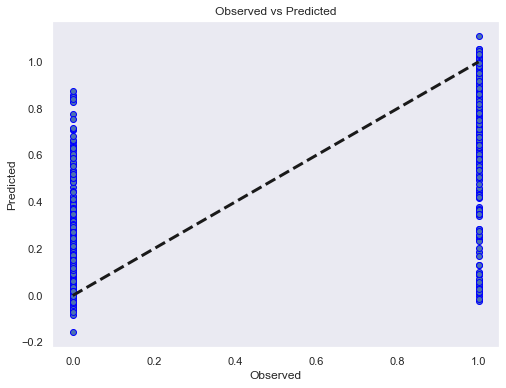

In [94]:
# So plot observed and predicted values of the test data for the best model i.e. tuned gradient boosting model
fig, ax = plt.subplots(figsize=(8, 6))
y_pred=gb_tuned.predict(X_test)
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.set_title("Observed vs Predicted")
plt.grid()
plt.show()

- We can see that points are dense on the line where predicted is equal to the observed.
- This implies that most of the predicted values are close to the true values with some exceptions as seen in the plot. 

## <a id = "link10"></a> 10. Actionable Insights & Recommendations - Conclude with the key takeaways for the business - What would your advice be to grow the business? (5 points)

- We can use this predictive model for demographic parameters to predict which customers will purchase travel packages. The ability to predict which demographic will purchase travel packages will focus marketing efforts on high gain populations and maximize profits.
- More time can be made available focusing time/energy on customers most likely to purchase travel packages in a extremely effective manner.
- As number of vaction packages are purchased by younger single adults and older adults, travel packages can be tuned specifically for their unique needs further increasing success of selling travel packages.
- Now that the demographic of likely purchasers is further defined, it is adviced to place locations for marketing and purchasing activities in locations to maximize sales.

## <a id = "link11"></a> 11. Notebook - Overall - Structure and flow - Well commented code (4 points)